In [4]:
import warnings
warnings.filterwarnings('ignore')
import os

In [10]:
path="D:\data"
dirs=os.listdir(path)

In [11]:
for file in dirs:
    print(file)

AE nameplate
main namplate
motor nameplate
motor rotation sticker
panel nameplate


In [12]:
img_width = 300
img_height = 300
EPOCHS = 10
BATCH_SIZE = 15
IMAGE_SHAPE = (img_width, img_height)

In [13]:
import tensorflow
from tensorflow import keras 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Activation, Conv2D, Dense, Dropout, GlobalAveragePooling2D
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications import InceptionV3
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from livelossplot import PlotLossesKeras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
datagen = ImageDataGenerator(rescale=1/255.,horizontal_flip=True,vertical_flip=True,height_shift_range=0.3,width_shift_range=0.5,brightness_range=[0.1,0.9],
rotation_range=90,validation_split=0.4,zoom_range=0.1)
train_gen = datagen.flow_from_directory(
    path,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = dirs,
    subset='training',
    shuffle=True,
    seed=50,
)

Found 302 images belonging to 5 classes.


In [15]:
validation_gen = datagen.flow_from_directory(
    path,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes = dirs,
    subset='validation',
    shuffle=True,
    seed=50,
)

Found 197 images belonging to 5 classes.


In [17]:
model = Sequential()
base_model = InceptionV3(include_top=False,input_shape=(img_width, img_height,3))
base_model.trainable=False
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.50))
model.add(Dense(1024, activation='relu'))
model.add(Dense(len(dirs), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 23,906,085
Trainable params: 2,103,301
Non-trainable params: 21,802,784
__________________________________

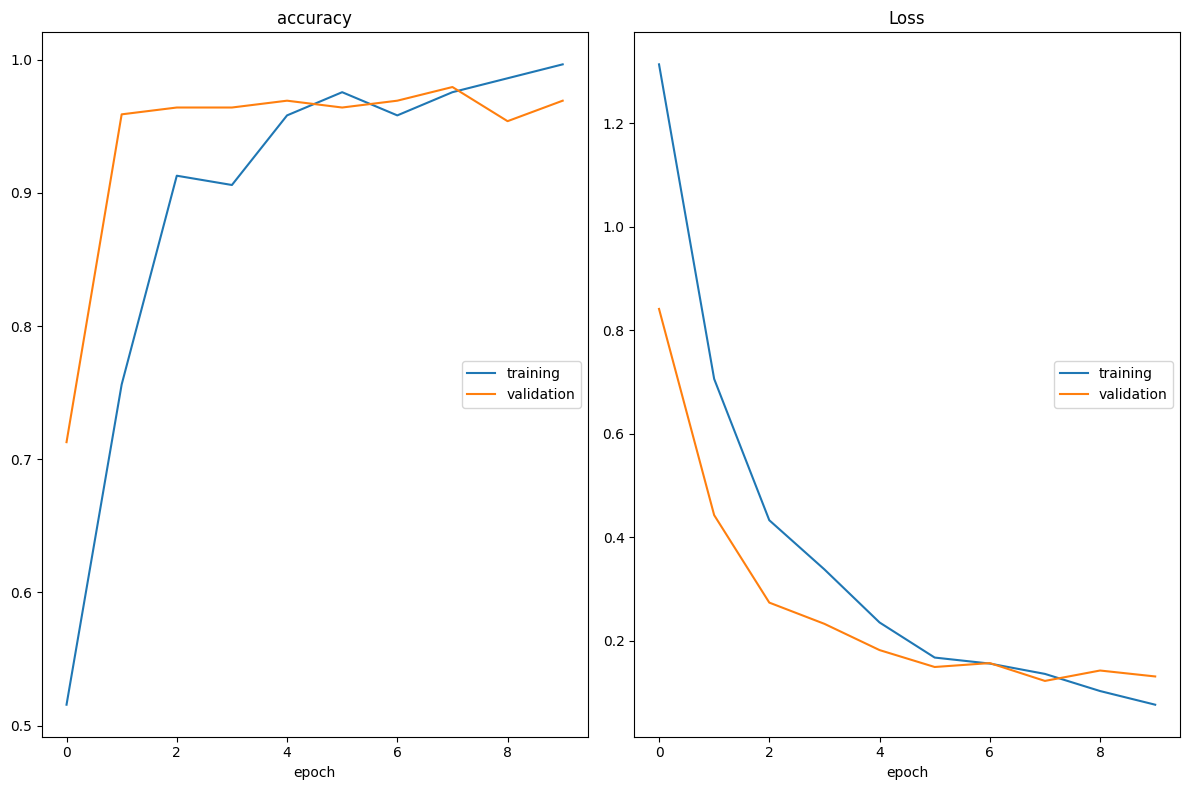

accuracy
	training         	 (min:    0.516, max:    0.997, cur:    0.997)
	validation       	 (min:    0.713, max:    0.979, cur:    0.969)
Loss
	training         	 (min:    0.076, max:    1.314, cur:    0.076)
	validation       	 (min:    0.122, max:    0.841, cur:    0.131)
20/20 [==============================] - 137s 7s/step - loss: 0.0761 - accuracy: 0.9965 - val_loss: 0.1307 - val_accuracy: 0.9692


In [18]:
steps_for_each_epoch = train_gen.samples // BATCH_SIZE
validation_steps_for_each_epoch = validation_gen.samples // BATCH_SIZE
OPTIMIZER = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='img_model.trained.weights.hdf5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
history = model.fit(train_gen, epochs=EPOCHS, steps_per_epoch=steps_for_each_epoch,validation_data=validation_gen,validation_steps=validation_steps_for_each_epoch,callbacks=[early_stop, checkpointer, PlotLossesKeras()],verbose=True)

In [19]:
test_loss, test_acc = model.evaluate(validation_gen)
# evaluate(validation_gen)
print('test accuracy : ', test_acc)
# score=model.evaluate(x_train,y_train,verbose=0)
trained_model =load_model('img_model.trained.weights.hdf5')

14/14 [==============================] - 56s 4s/step - loss: 0.1430 - accuracy: 0.9594
test accuracy :  0.9593908786773682


In [20]:
import keras.utils as image

In [99]:
x1=[]
def predict_img(img_path):
    img = image.load_img(path+img_path, target_size=(300, 300))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
 

    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    p = trained_model.predict(img[np.newaxis,...])
    print('Confidence: ',str(round(np.max(p[0])*100, 2))+'%')
    print('Class: ',dirs[np.argmax(p[0])])
    x1.append(dirs[np.argmax(p[0])])
    print("\n")

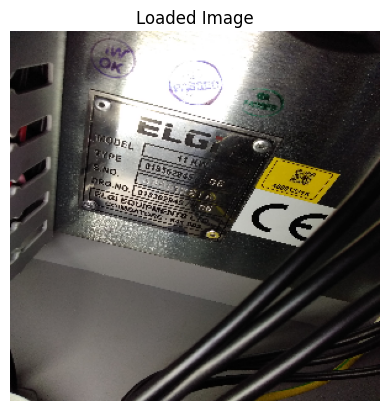

1/1 [==============================] - 0s 319ms/step
Confidence:  83.4%
Class:  panel nameplate




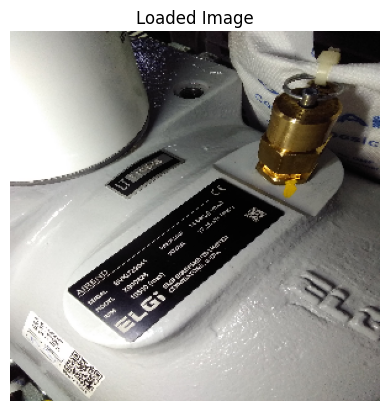

1/1 [==============================] - 1s 601ms/step
Confidence:  99.74%
Class:  AE nameplate




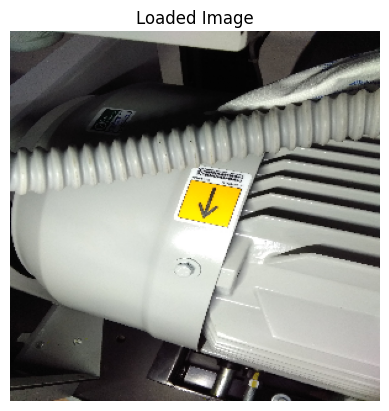

1/1 [==============================] - 0s 299ms/step
Confidence:  99.11%
Class:  motor rotation sticker




In [100]:

# import the modules
import os
from os import listdir

 
# get the path/directory
folder_dir = "D:/data/test"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        x='/test/'+images
        predict_img(x)
        

      

    

In [101]:
print(x1)
dirs1=['AE nameplate', 'main namplate', 'motor nameplate', 'motor rotation sticker', 'panel nameplate']
temp1 = []
for element in dirs:
    if element not in x1:
        temp1.append(element)
 
print(temp1,"not in the file")

['panel nameplate', 'AE nameplate', 'motor rotation sticker']
['main namplate', 'motor nameplate'] not in the file
